# Linear Regression

Why use linear regression?

1. Easy to use
2. Easy to interpret
3. Basis for many methods
4. Runs fast
5. Most people have heard about it :-) 

### Libraries in Python for Linear Regression

The two most popular ones are

1. `scikit-learn`
2. `statsmodels`

We highly recommend learning `scikit-learn` since that's also the machine learning package in Python.

## Problem

Could we predict price of weed in a state using the demographic information? 

For this session, let's do this. For January 2015, let's find average price for high quality weed across all the states. Let's assume that we don't know what the prices are for the following states: 
<br>
iowa, kentucky, missouri, nevada, wyoming, south dakota, new jersey, michigan, idaho
<br>

Those are our **test** set. The remaining states are our **train** set. We need to train the model on the train dataset and predict for the test dataset. 

Since we also know the actual mean prices for the test states, let's verify how good our models are.

In [1]:
import pandas as pd

In [2]:
#Load the data
weed_pd = pd.read_csv("../data/Weed_Price.csv", parse_dates=[-1])
demo_pd = pd.read_csv("../data/Demographics_State.csv")

In [3]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [4]:
weed_pd.dtypes

State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

In [5]:
demo_pd.head()

,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4


In [6]:
demo_pd.dtypes

region                object
total_population       int64
percent_white          int64
percent_black          int64
percent_asian          int64
percent_hispanic       int64
per_capita_income      int64
median_rent            int64
median_age           float64
dtype: object

As seen above, weed price dataset has states' first alphabet capitalized. 
The below command will convert it to lower case

In [7]:
str.lower("Alabama")

'alabama'

In [ ]:
?weed_pd.apply

In [8]:
weed_pd.State = weed_pd["State"].apply(lambda x: str.lower(x))

In [9]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,california,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [10]:
pd.unique(weed_pd.State)

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'montana',
       'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico',
       'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma',
       'oregon', 'maryland', 'massachusetts', 'michigan', 'minnesota',
       'mississippi', 'missouri', 'pennsylvania', 'rhode island',
       'south carolina', 'south dakota', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
       'wyoming'], dtype=object)

In [11]:
pd.unique(demo_pd.region)

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'district of columbia',
       'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana',
       'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland',
       'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri',
       'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey',
       'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio',
       'oklahoma', 'oregon', 'pennsylvania', 'rhode island',
       'south carolina', 'south dakota', 'tennessee', 'texas', 'utah',
       'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin',
       'wyoming'], dtype=object)

In [12]:
#Let's get month and year of the date, so that we can select only Jan 2015 data
weed_pd["Month"] = weed_pd["date"].apply(lambda x: x.month)
weed_pd["Year"] = weed_pd["date"].apply(lambda x: x.year)

In [13]:
weed_jan2015_pd = weed_pd.ix[(weed_pd.Year==2015) & (weed_pd.Month==1)]

In [14]:
weed_jan2015_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,Month,Year
51,alabama,337.54,1539,208.24,1463,NaN,182,2015-01-01,1,2015
52,alaska,303.02,350,270.45,475,NaN,37,2015-01-01,1,2015
53,arizona,298.51,2638,209.43,2426,NaN,306,2015-01-01,1,2015
54,arkansas,341.68,846,207.20,836,NaN,145,2015-01-01,1,2015
55,california,243.96,16512,189.35,19151,NaN,1096,2015-01-01,1,2015


In [15]:
weed_jan2015_summarized = weed_jan2015_pd[["State", "HighQ"]].groupby("State").mean().reset_index()

In [16]:
#The source price dataset for our model 
weed_jan2015_summarized

,State,HighQ
0,alabama,336.504839
1,alaska,302.972581
2,arizona,297.782903
3,arkansas,341.705806
4,california,243.602258
5,colorado,243.273226
6,connecticut,336.442258
7,delaware,363.908387
8,district of columbia,348.107097
9,florida,300.604194


In [17]:
test_states = ["iowa", "kentucky", "missouri", "nevada", "wyoming", \
               "south dakota", "new jersey", "michigan", "idaho" ]

In [18]:
data_for_model = pd.merge(weed_jan2015_summarized, demo_pd, left_on="State", right_on="region")

In [19]:
data_for_model.head()

,State,HighQ,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,336.504839,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,302.972581,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,297.782903,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,341.705806,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,243.602258,california,37659181,40,6,13,38,29527,1119,35.4


In [20]:
#Now, creating train and test dataset
criterion = weed_jan2015_summarized["State"].map(lambda x: x in test_states)
#Another way to do it
#criterion = weed_jan2015_summarized.State.isin(test_states)

In [21]:
print "Train data labels: \n", ~criterion, "\n\n", "Test data labels: \n", criterion

Train data labels: 
0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14     True
15    False
16     True
17    False
18     True
19     True
20     True
21     True
22    False
23     True
24     True
25    False
26     True
27     True
28    False
29     True
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41    False
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50    False
Name: State, dtype: bool 

Test data labels: 
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25     True
26    Fals

In [22]:
train = data_for_model[~criterion]
test = data_for_model[criterion]

In [23]:
train.shape, test.shape

((42, 11), (9, 11))

In [24]:
train

,State,HighQ,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,336.504839,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,302.972581,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,297.782903,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,341.705806,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,243.602258,california,37659181,40,6,13,38,29527,1119,35.4
5,colorado,243.273226,colorado,5119329,70,4,3,21,31109,825,36.1
6,connecticut,336.442258,connecticut,3583561,70,9,4,14,37892,880,40.2
7,delaware,363.908387,delaware,908446,65,21,3,8,29819,828,38.9
8,district of columbia,348.107097,district of columbia,619371,35,49,3,10,45290,1154,33.8
9,florida,300.604194,florida,19091156,57,15,2,23,26236,838,41.0


In [25]:
test

,State,HighQ,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
12,idaho,274.990323,idaho,1583364,84,1,1,11,22568,607,34.9
15,iowa,364.967742,iowa,3062553,88,3,2,5,27027,534,38.1
17,kentucky,339.014516,kentucky,4361333,86,8,1,3,23462,506,38.2
22,michigan,287.620000,michigan,9886095,76,14,3,5,25681,623,39.1
25,missouri,351.059355,missouri,6007182,81,11,2,4,25649,549,38.0
28,nevada,265.610968,nevada,2730066,53,8,7,27,26589,840,36.6
30,new jersey,345.144839,new jersey,8832406,59,13,9,18,36027,1024,39.1
41,south dakota,357.954516,south dakota,825198,84,1,1,3,25740,517,36.9
50,wyoming,320.450968,wyoming,570134,85,1,1,9,28902,647,36.8


### Linear regression 

Let's use `statsmodels` for this workshop. 

Linear regression is of the form:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is what we have the predict/independent variable/response variable
- $\beta_0$ is the intercept/slope
- $\beta_1$ is the coefficient for $x_1$ (the first feature/dependent variable)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature/dependent variable)

The $\beta$ are called *model coefficients*

The model coefficients are estimated in this process. (In Machine Learning parlance - the weights are learned using the algorithm). The objective function is least squares method. 
<br>

**Least Squares Method** : To identify the weights so that the overall solution minimizes the sum of the squares of the errors made in the results of every single equation. [Wiki](https://en.wikipedia.org/wiki/Least_squares)

![Estimating coefficients](img/leastsquare.gif)


In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [27]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [28]:
#First step: Let's visualize bivariate plots with  a trend line

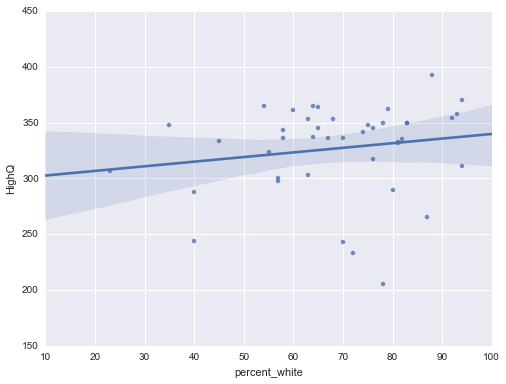

In [29]:
sns.regplot(x="percent_white", y = "HighQ", data=train)

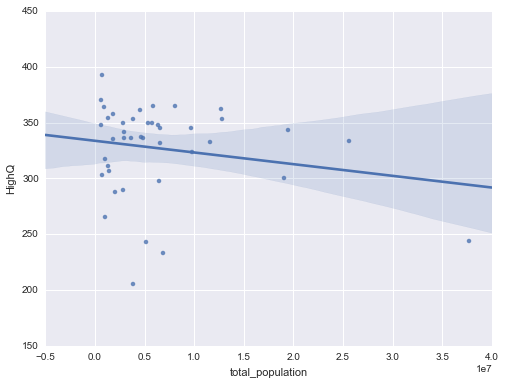

In [30]:
sns.regplot(x="total_population", y="HighQ", data=train)

**Exercise** Plot for `HighQ` vs `per_capita_income` 

**Fitting another kind of plot/model**

In [ ]:
?sns.lmplot

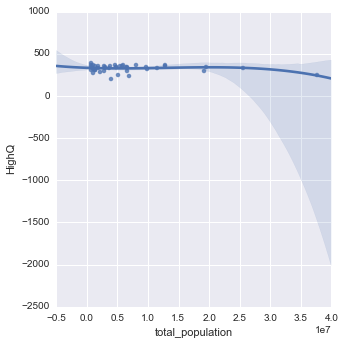

In [31]:
sns.lmplot(x="total_population", y="HighQ", data=train, order=3)

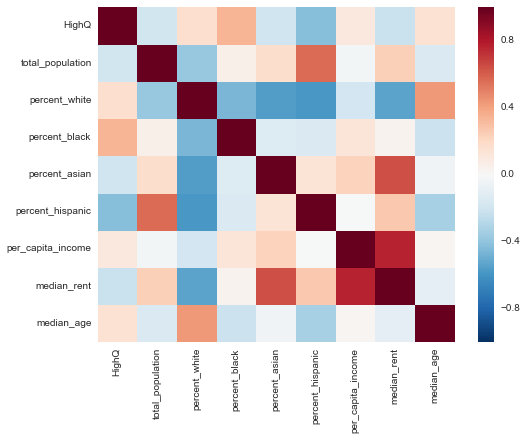

In [32]:
#More plots.

#Visualizing correlation matrix using a heatmap

sns.heatmap(train.corr())

In [ ]:
?sns.pairplot

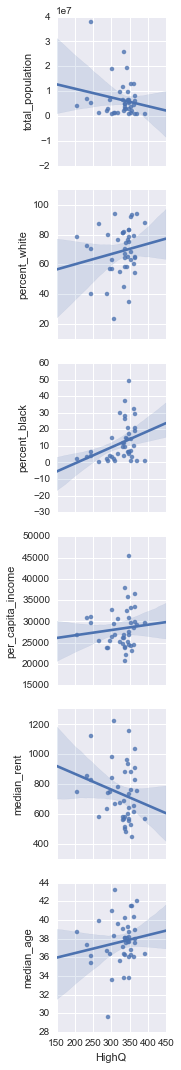

In [33]:
#Multiple scatter plot

sns.pairplot(train, x_vars='HighQ', y_vars=['total_population', 'percent_white', 'percent_black', \
                                           'per_capita_income', 'median_rent', 'median_age'], kind='reg')

**First, let's build a single variable model.**

Let's try to estimate price as a function of population

In [34]:
feature_columns = ["total_population"]
train_x = train[feature_columns]
train_y = train['HighQ']

In [35]:
model_1 = LinearRegression()
model_1.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print model_1.intercept_
print model_1.coef_

333.662079418
[ -1.04692952e-06]


**Let's use the model for prediction**

In [37]:
model_1_predict = model_1.predict(test[feature_columns])

In [38]:
model_1_predict = pd.DataFrame({'States': test.State, 'Actual Price': test.HighQ, 'Predicted Price': model_1_predict})

In [39]:
model_1_predict

,Actual Price,Predicted Price,States
12,274.990323,332.004409,idaho
15,364.967742,330.455802,iowa
17,339.014516,329.096071,kentucky
22,287.620000,323.312035,michigan
25,351.059355,327.372983,missouri
28,265.610968,330.803893,nevada
30,345.144839,324.415173,new jersey
41,357.954516,332.798155,south dakota
50,320.450968,333.065189,wyoming


**Computing mean squared error**

In [40]:
#Root Mean square error on test dataset
np.sqrt(np.mean(np.square(model_1_predict['Actual Price'] - \
                         model_1_predict['Predicted Price'])))

36.281030710323748

**Lower the RMSE, better the model **

**Exercise: Create model using `total_population` and `per_capita_income` as the features. Report RMSE**

### Pointers

To build the model the right way, the following need to be done. They are left as exercise. 

1. Scale the features
2. Use cross-validation
3. As more features are added, the model becomes complicated and would overfit the data. Will need regularization
4. Try feature transformation to see if lower RMSE is possible. 

### Why wasn't **R-square** and **p-value** covered? 

- Linear models rely upon a lot of assumptions ([here](http://andrewgelman.com/2013/08/04/19470/)). If assumptions are violated, the diagnostics obtained from the model cannot be relied. 
- Biggest challenge is that adding any feature will increase the R-square. One way to counter this is to use adjusted R-squre.
- Take a step back and think - why do we need to report those numbers? We want some estimate of generalization. Cross-validation score provides a general framework for reporting generalization. And this will hold good across all models. And thus, multiple models can be compared. This is the machine learning approach and is widely used in practice.

### Bonus: R-square and p-value

This won't be covered in the worksop, but the code is left here, for experimentation later on.
<br>
This would be done using `statsmodels`

In [41]:
import statsmodels.formula.api as smf

In [42]:
#Create the model
lm_model_1 = smf.ols(formula='HighQ ~ total_population', data=train).fit()

#Coefficients of the model
lm_model_1.params

Intercept           333.662079
total_population     -0.000001
dtype: float64

In [43]:
lm_model_1.predict(test)

array([ 332.00440891,  330.45580229,  329.09607117,  323.31203475,
        327.37298327,  330.80389274,  324.41517287,  332.79815527,
        333.0651893 ])

In [44]:
#95% Confidence interval of the model
lm_model_1.conf_int()

,0,1
Intercept,316.876244,3.504479e+02
total_population,-0.000003,6.656067e-07


**Exercise: Find the 90% CI **

In [45]:
# p-value of the model coefficients
lm_model_1.pvalues

Intercept           5.942308e-34
total_population    2.238336e-01
dtype: float64

In [46]:
#R-squared for the model
lm_model_1.rsquared

0.036761583666067521

In [47]:
#Summary of fitted model
lm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HighQ   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.527
Date:                Fri, 02 Oct 2015   Prob (F-statistic):              0.224
Time:                        22:15:55   Log-Likelihood:                -213.72
No. Observations:                  42   AIC:                             431.4
Df Residuals:                      40   BIC:                             434.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          333.6621      8.305     40.174      0.000       316.876   350.448
total_population -1.047e-06   8.47e-07     -1.236      0.224     -2.76e-06  6.66e-07
==============================================================================
Omnibus:                       14.136   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.943
Skew:                          -1.303   Prob(JB):                     0.000569
Kurtosis:                       4.323   Cond. No.                     1.31e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#Another model with total_population and per_capita_income
lm_model_2 = smf.ols(formula='HighQ ~ total_population + per_capita_income', data=train).fit()

In [49]:
lm_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HighQ   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9559
Date:                Fri, 02 Oct 2015   Prob (F-statistic):              0.393
Time:                        22:16:00   Log-Likelihood:                -213.50
No. Observations:                  42   AIC:                             433.0
Df Residuals:                      39   BIC:                             438.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           309.7736     38.330      8.082      0.000       232.244   387.304
total_population  -1.034e-06   8.54e-07     -1.211      0.233     -2.76e-06  6.93e-07
per_capita_income     0.0008      0.001      0.639      0.527        -0.002     0.004
==============================================================================
Omnibus:                       14.699   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.822
Skew:                          -1.335   Prob(JB):                     0.000367
Kurtosis:                       4.383   Cond. No.                     6.01e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Is model_2 better than model_1 ? **